# Neural Network: One Hidden Layer

## Contents

1. Make some data
2. Neural network module
3. Train the model

In [1]:
# imoprt libraries

import torch 
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)

In [2]:
# The function for plotting the model

def PlotStuff(X, Y, model, epoch, leg=True):
    
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

## 1. Make some data

In [3]:
# Create dataset class

class Data(Dataset):
    
    def __init__(self):
        self.x = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
        self.y = torch.zeros(self.x.shape[0])
        self.y[ (self.x[:, 0] > -4) & (self.x[:, 0] < 4)] = 1.0
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [4]:
# Create dataset

dataset = Data()

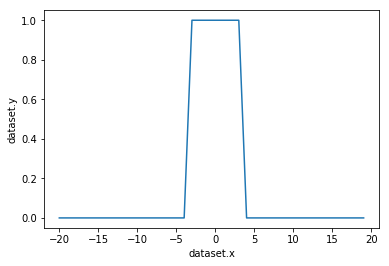

In [5]:
# plot the dataset

plt.plot(dataset.x.numpy(), dataset.y.numpy())
plt.xlabel('dataset.x')
plt.ylabel('dataset.y')
plt.show()

## 2 .Neural network module

In [6]:
# Define the net class

class Net(nn.Module):
    
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self, x):
        z1 = self.linear1(x)
        a1 = torch.sigmoid(z1)
        z2 = self.linear2(a1)
        out = torch.sigmoid(z2)
        return out
    

In [7]:
# Define criterion, optimizer, dataloader, and High parameters

D_in = 1
H = 2
D_out = 1
BATCH_SIZE = 5
learning_rate = 0.1

model = Net(D_in, H, D_out)

# criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
trainloader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE)

## 3. Train the model

In [8]:
import time
epochs = 50000

def train_model(epochs):
    
    for epoch in range(epochs):
        
        total = 0
        for x, y in trainloader:
            
            yhat = model(x)
            optimizer.zero_grad()
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            total += loss.sum().item()
        
        if epoch % 5000 == 0:
            print("The epcoh: {}, loss: {}".format(epoch, total))
            
            
            
start = time.time()
train_model(epochs)
end = time.time()
print("CPU time:", start - end)

/disk2/lz/anaconda3/envs/tf/lib/python3.7/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


The epcoh: 0, loss: 5.300515532493591
The epcoh: 5000, loss: 0.031695582321844995
The epcoh: 10000, loss: 0.014013783191330731
The epcoh: 15000, loss: 0.00879857235122472
The epcoh: 20000, loss: 0.006357286431011744
The epcoh: 25000, loss: 0.004955865413649008
The epcoh: 30000, loss: 0.004050694034958724
The epcoh: 35000, loss: 0.003417603045818396
The epcoh: 40000, loss: 0.0029520287571358494
The epcoh: 45000, loss: 0.0026000827056122944
CPU time: -157.17377161979675


In [9]:
# Make a prediction

X_ = torch.tensor([[-18.0], [-8.0], [-4.0], [0.0], [2.0], [3.0], [4.0], [8.0], [18.0]]) # y[ -0.4 < < 0.4] = 1 else = 0
Yhat = model(X_)
Yhat

tensor([[6.8306e-05],
        [6.8306e-05],
        [1.5358e-03],
        [9.9976e-01],
        [9.9974e-01],
        [9.9747e-01],
        [1.5574e-03],
        [7.2053e-05],
        [7.2052e-05]], grad_fn=<SigmoidBackward>)

In [10]:
# To GPU


cuda = torch.cuda.is_available()
if cuda:
    model = model.cuda()
    criterion = criterion.cuda()

epochs = 50000

def train_model(epochs):
    
    for epoch in range(epochs):
        
        total = 0
        for x, y in trainloader:
            if cuda:
                x, y = x.cuda(), y.cuda()
            yhat = model(x)
            optimizer.zero_grad()
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            total += loss.sum().item()
        
        if epoch % 5000 == 0:
            print("The epcoh: {}, loss: {}".format(epoch, total))


start = time.time()
train_model(epochs)
end = time.time()
print("GUP time:", start - end)

The epcoh: 0, loss: 0.0023165707898442633
The epcoh: 5000, loss: 0.0020904022167087533
The epcoh: 10000, loss: 0.001906472236441914
The epcoh: 15000, loss: 0.0017482668954471592
The epcoh: 20000, loss: 0.0016091838660940994
The epcoh: 25000, loss: 0.0014955532096792012
The epcoh: 30000, loss: 0.001401405064825667
The epcoh: 35000, loss: 0.001316329711698927
The epcoh: 40000, loss: 0.0012382874010654632
The epcoh: 45000, loss: 0.0011683637349051423
GUP time: -419.5423107147217
